# 2


In [1]:
from load_datasets import (
    train_val_generator,
    val_generator,
    train_generator,
    test_generator,
    X_train,
    X_val,
)
from helper_functions import flatten_list, plot_and_print_model_metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def model_cnn_2_classes(
    convolution_layers=[],
    mlp_layers=[],
    *,
    flatten_layer=[Flatten(name="flatten_layer")],
    name: str = "cnn_model_2_classes",
    optimizer=Adam(learning_rate=0.001),
    metrics=["acc"],
):
    model = Sequential(
        convolution_layers
        + flatten_layer
        + mlp_layers
        + [Dense(1, activation="sigmoid", name="output_layer")],
        name=name,
    )
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics)
    model.summary()
    return model

In [3]:
X_train.shape[1:]

(32, 32, 3)

In [4]:
input_shape = X_train.shape[1:]
model_1__kernel_numbers = [32, 64, 128, 128]
model_1__cnn_layers = flatten_list([
    [
        Conv2D(
            kernel_number,
            padding="same",
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
    for kernel_number in model_1__kernel_numbers
])
model_1__mlp_layers = [Dropout(.3), Dense(512, activation='relu', kernel_initializer='he_normal')]
model_1__cnn_layers, model_1__mlp_layers

([<keras.layers.convolutional.Conv2D at 0x20a68cfb310>,
  <keras.layers.core.dense.Dense at 0x20a68d6f100>])

In [5]:
model_1 = model_cnn_2_classes(model_1__cnn_layers, model_1__mlp_layers, name="model_1")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0   

In [6]:
int(len(X_train) / 32), int(len(X_val) / 32)

(50, 12)

In [7]:
def fit_then_evaluate_model(
    model,
    *,
    steps_per_epoch=50,
    validation_steps=12,
    early_stopper=EarlyStopping(
        monitor="val_acc", mode="max", patience=10, restore_best_weights=True
    )
):
    model.fit(
        train_val_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=100,
        callbacks=[early_stopper],
        validation_data=val_generator,
        validation_steps=validation_steps,
    )
    plot_and_print_model_metrics(model)

Epoch 1/100
50/50 [==============================] - 3s 19ms/step - loss: 0.7544 - acc: 0.4981 - val_loss: 0.6531 - val_acc: 0.8438
Epoch 2/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6929 - acc: 0.5063 - val_loss: 0.7580 - val_acc: 0.0573
Epoch 3/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6868 - acc: 0.5387 - val_loss: 1.0088 - val_acc: 0.0052
Epoch 4/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6933 - acc: 0.5281 - val_loss: 0.6096 - val_acc: 0.7865
Epoch 5/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6772 - acc: 0.5856 - val_loss: 0.4073 - val_acc: 0.9870
Epoch 6/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6847 - acc: 0.5781 - val_loss: 0.5649 - val_acc: 0.8385
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6665 - acc: 0.5919 - val_loss: 0.7519 - val_acc: 0.4688
Epoch 8/100
50/50 [==============================] - 1s 15ms/step - loss: 0.

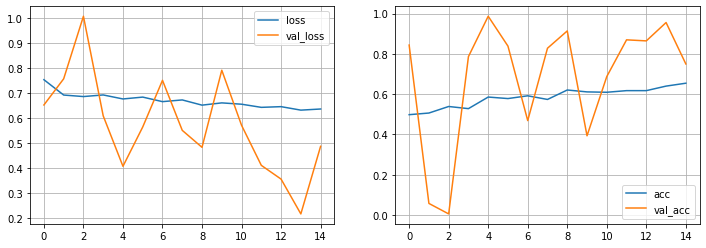

In [8]:
fit_then_evaluate_model(model_1)

## b)


### Testing different kernel numbers

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 128)        0   

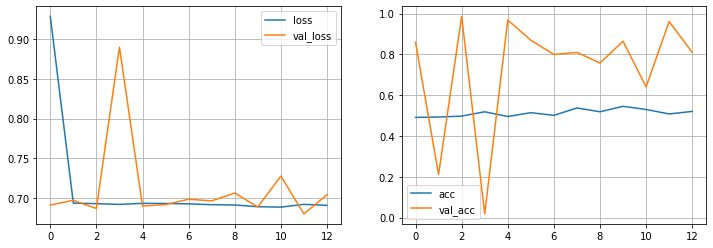

In [9]:
model_2__kernel_numbers = [32, 64, 128]
model_2__cnn_layers = flatten_list([
    [
        Conv2D(
            kernel_number,
            padding="same",
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
    for kernel_number in model_2__kernel_numbers
])
model_2__mlp_layers = [Dropout(.3), Dense(512, activation='relu', kernel_initializer='he_normal')]
model_2 = model_cnn_2_classes(model_2__cnn_layers, model_2__mlp_layers, name='model_2')
fit_then_evaluate_model(model_2)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 128)        0   

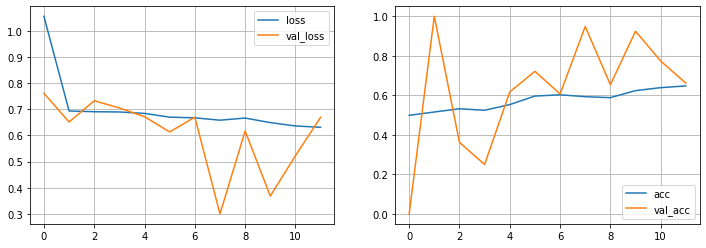

In [10]:
model_3__kernel_numbers = [32, 64, 128, 256]
model_3__cnn_layers = flatten_list([
    [
        Conv2D(
            kernel_number,
            padding="same",
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
    for kernel_number in model_3__kernel_numbers
])
model_3__mlp_layers = [Dropout(.3), Dense(512, activation='relu', kernel_initializer='he_normal')]
model_3 = model_cnn_2_classes(model_3__cnn_layers, model_3__mlp_layers, name='model_3')
fit_then_evaluate_model(model_3)

### Testing different mlp layers

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0   

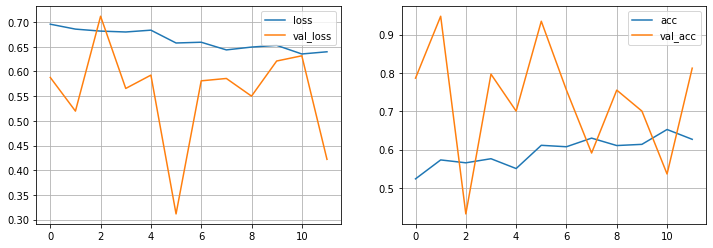

In [11]:
model_4_nodes = [512,256]
model_4__mlp_layers = [Dropout(.3)] + [Dense(nodes, activation='relu', kernel_initializer='he_normal') for nodes in model_4_nodes]
model_4 = model_cnn_2_classes(model_1__cnn_layers, model_4__mlp_layers, name='model_4')
fit_then_evaluate_model(model_4)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0   

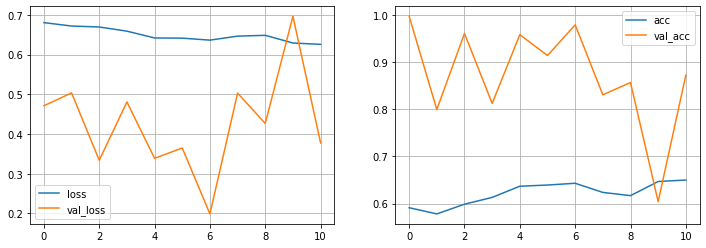

In [12]:
model_5__mlp_layers = [Dropout(.3), Dense(256, activation='relu', kernel_initializer='he_normal')]
model_5 = model_cnn_2_classes(model_1__cnn_layers, model_5__mlp_layers, name='model_5')
fit_then_evaluate_model(model_5)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0   

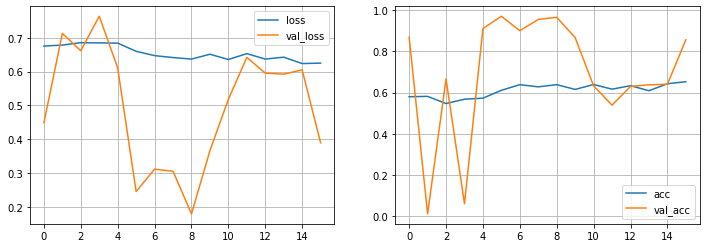

In [13]:
model_6_nodes = [256, 128]
model_6__mlp_layers = [Dropout(.3)] + [Dense(nodes, activation='relu', kernel_initializer='he_normal') for nodes in model_6_nodes]
model_6 = model_cnn_2_classes(model_1__cnn_layers, model_6__mlp_layers, name='model_6')
fit_then_evaluate_model(model_6)